In [29]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import os # librería para interactuar con el sistema de archivos 

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

# Archivos
sca_dir = 'DATA/'
archivos_sca = os.listdir(sca_dir)
print("Archivos sca cargados:",', '.join(archivos_sca))

Archivos sca cargados: parte1-caso1.csv, parte1-caso2.csv


## Caso 1

In [30]:
caso = 0

## Grafico de buffer en el generador
print("archivo de grafico: ",archivos_sca[caso])
data = pandas.read_csv(sca_dir + archivos_sca[caso])


archivo de grafico:  parte1-caso1.csv


### Ocupacion de buffers en el sistema

<function matplotlib.pyplot.show(close=None, block=None)>

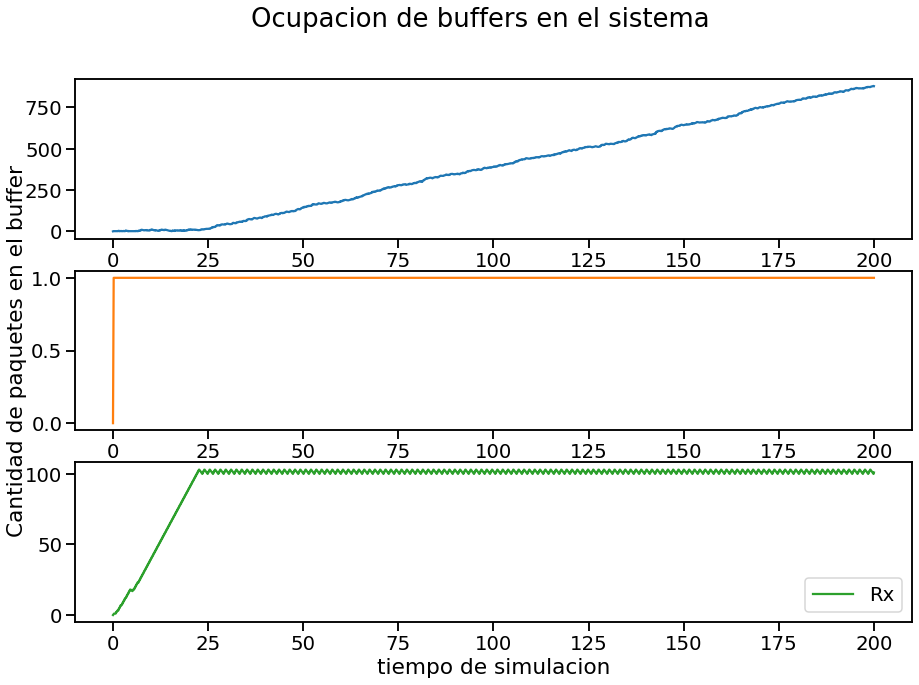

In [31]:
# Extraemos los valores de nuestro "vector"

time_gen = data.loc[(data['module'] == 'Network.nodeTx.traTx') & (data['name'] == 'BufferSizeVector'), 'vectime'].tolist()
buffer_gen = data.loc[(data['module'] == 'Network.nodeTx.traTx') & (data['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()

time_queue = data.loc[(data['module'] == 'Network.queue0') & (data['name'] == 'BufferSizeVector'), 'vectime'].tolist()
buffer_queue = data.loc[(data['module'] == 'Network.queue0') & (data['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()

time_sink = data.loc[(data['module'] == 'Network.nodeRx.traRx') & (data['name'] == 'BufferSizeVector'), 'vectime'].tolist()
buffer_sink = data.loc[(data['module'] == 'Network.nodeRx.traRx') & (data['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()

# convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
time_gen = list(map(float,time_gen[0].split()))
time_queue = list(map(float,time_queue[0].split()))
time_sink = list(map(float,time_sink[0].split()))
buffer_gen = list(map(float,buffer_gen[0].split()))
buffer_queue = list(map(float,buffer_queue[0].split()))
buffer_sink = list(map(float,buffer_sink[0].split()))

# Graficamos
fig, ax = plt.subplots(3,figsize=(15, 10))
fig.suptitle('Ocupacion de buffers en el sistema')
ax[0].plot(time_gen,buffer_gen, color='tab:blue', label="Tx")
ax[1].plot(time_queue,buffer_queue, color='tab:orange', label="Nx")
ax[2].plot(time_sink,buffer_sink, color='tab:green', label="Rx")
plt.title('')
plt.xlabel("tiempo de simulacion")
ax[1].set_ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Paquetes generados y paquetes consumidos

In [32]:
# FIXME: datos no cargados
# Extraemos la info
time_gen = data.loc[(data['module'] == 'Network.nodeTx.gen') & (data['name'] == 'packetSent'), 'vectime'].tolist()
packets_gen = data.loc[(data['module'] == 'Network.nodeTx.gen') & (data['name'] == 'packetSent'), 'vecvalue'].tolist()

time_sink = data.loc[(data['module'] == 'Network.nodeRx.sink') & (data['name'] == 'Delay'), 'vecvalue'].tolist()
packets_sink = data.loc[(data['module'] == 'Network.nodeRx.sink') & (data['name'] == 'packetReceived'), 'vecvalue'].tolist()

# Convertimos los valores a flotantes
time_gen = list(map(float,time_gen[0].split()))
packets_gen = list(map(float,packets_gen[0].split()))
time_sink = list(map(float,time_sink[0].split()))
packets_sink = list(map(float,packets_sink[0].split()))

#FIXME: terminar
# # Comprobar cuál lista es más corta y necesitará ser rellenada
# if len(time_gen) < len(time_sink):
#     # Calcular cuántos valores de relleno necesitamos
#     fill_count = len(time_sink) - len(time_gen)
#     # Agregar valores de relleno al final de la lista más corta
#     time_gen += [time_gen[len(time_gen)-1]] * fill_count
#     packets_gen += [packets_gen[len(packets_gen)-1]] * fill_count
# else:
#     fill_count = len(time_gen) - len(time_sink)
#     time_sink += [time_sink[len(time_sink)]] * fill_count
#     packets_sink += [time_sink[len(packets_sink)]] * fill_count

# # Graficamos el gráfico de líneas
# plt.figure(figsize=(10, 6))
# plt.plot(time_gen, packets_gen, color='tab:orange', label='gen')
# plt.plot(time_sink, packets_sink, color='tab:blue', label='sink')
# plt.title('Paquetes generados vs recibidos')
# plt.xlabel('Tiempo de simulación')
# plt.ylabel('Paquetes')
# plt.show()

## Carga util vs carga recibida/ofrecida
Los datos se sacan de todos los casos

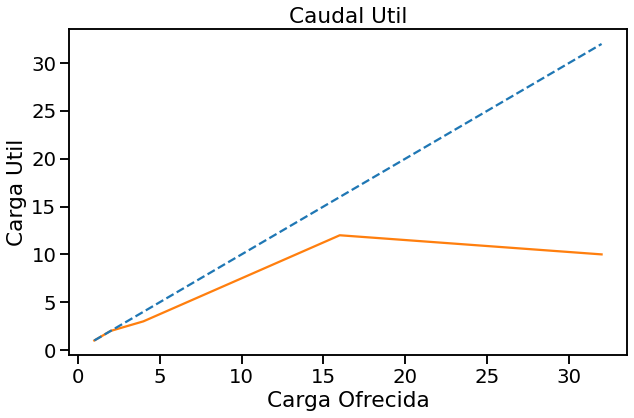

In [33]:
# FIXME: datos de ejemplo, cargar reales

# Carga Util de los casos 1,...,n = cUtil
# Carga ofrecida de los casos 1,...,n = cOfrecida

cUtil = [1,2,4,8,16,32]     # X
cOfrecida = [1,2,3,6,12,10] # Y

# Graficamos el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cUtil, cOfrecida, color='tab:orange', label='Carga Recibida')
plt.plot(cUtil, cUtil, color='tab:blue', label='Carga Esperada', linestyle='--')
plt.title('Caudal Util')
plt.xlabel('Carga Ofrecida')
plt.ylabel('Carga Util')
plt.show()

# FIXME: no esta en paquetes por segundo, no se bien como seria graficar el esperado.